In [8]:
#importing the libraries - "importing the libraries"
import pandas as pd

#visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

#default plot size
plt.rcParams['figure.figsize'] = 10,12

#Disable warning
import warnings
warnings.filterwarnings('ignore')


In [27]:
#reading datasets - "reading datasets"
df = pd.read_excel('E:/Coder Subha/Machine Learning/Latest CV/covid_india_cases.xlsx')
df_india = df.copy()
df

,Unnamed: 0,Unnamed: 1,Name of State / UT,Unnamed: 3,Confirmed,Active,Recovered,Deaths
0,NaN,NaN,Maharasthra,NaN,9318,7530,1388,400
1,NaN,NaN,Gujrat,NaN,3774,3159,434,181
2,NaN,NaN,Delhi,NaN,3314,2182,1078,54
3,NaN,NaN,Madhya Pradesh,NaN,2481,1986,373,122
4,NaN,NaN,Rajasthan,NaN,2383,1550,781,52
5,NaN,NaN,Tamil Nadu,NaN,2058,905,1128,25
6,NaN,NaN,Uttar Pradesh,NaN,2053,1557,462,34
7,NaN,NaN,Andhra Pradesh,NaN,1332,1014,287,31
8,NaN,NaN,Telangana,NaN,1009,610,374,25
9,NaN,NaN,West Bengal,NaN,725,584,119,22


In [28]:
#Co-ordinate of Indian states and UT
India_cod = pd.read_excel('E:/Coder Subha/Machine Learning/Latest CV/Indian Coordinates.xlsx')

In [43]:
#day by day data of India,Italy,Wuhan,Korea
df1 = pd.ExcelFile('E:/Coder Subha/Machine Learning/Latest CV/per_day_cases.xlsx')
dbd_India = pd.read_excel(df1,'India')
dbd_Italy = pd.read_excel(df1,'Italy')
dbd_Wuhan = pd.read_excel(df1,'Wuhan')
dbd_Korea = pd.read_excel(df1,'Korea')

In [30]:
df.style.background_gradient(cmap='Reds')

,Unnamed: 0,Unnamed: 1,Name of State / UT,Unnamed: 3,Confirmed,Active,Recovered,Deaths
0,nan,nan,Maharasthra,nan,9318,7530,1388,400
1,nan,nan,Gujrat,nan,3774,3159,434,181
2,nan,nan,Delhi,nan,3314,2182,1078,54
3,nan,nan,Madhya Pradesh,nan,2481,1986,373,122
4,nan,nan,Rajasthan,nan,2383,1550,781,52
5,nan,nan,Tamil Nadu,nan,2058,905,1128,25
6,nan,nan,Uttar Pradesh,nan,2053,1557,462,34
7,nan,nan,Andhra Pradesh,nan,1332,1014,287,31
8,nan,nan,Telangana,nan,1009,610,374,25
9,nan,nan,West Bengal,nan,725,584,119,22


In [31]:
#"Analysing cases in India"
Tot_Cases = df.groupby('Name of State / UT')['Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Active
Name of State / UT,
Maharasthra,7530
Gujrat,3159
Delhi,2182
Madhya Pradesh,1986
Uttar Pradesh,1557
Rajasthan,1550
Andhra Pradesh,1014
Tamil Nadu,905
Telangana,610


In [17]:
total_active = df['Active'].sum()
print('No. of cases in India:',total_active)

No. of cases in India: 22784


In [18]:
#zoomable map using folium - "Visualing the Spread Geographically"
df_full = pd.merge(India_cod,df,on='Name of State / UT')
map = folium.Map(location=[20,70], zoom_start=4, tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Active'], df_full['Name of State / UT'])
 
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Active</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

SyntaxError: invalid syntax (<ipython-input-18-73a02f896c1b>, line 5)

In [33]:
df_full = pd.merge(India_cod,df,on='Name of State / UT')

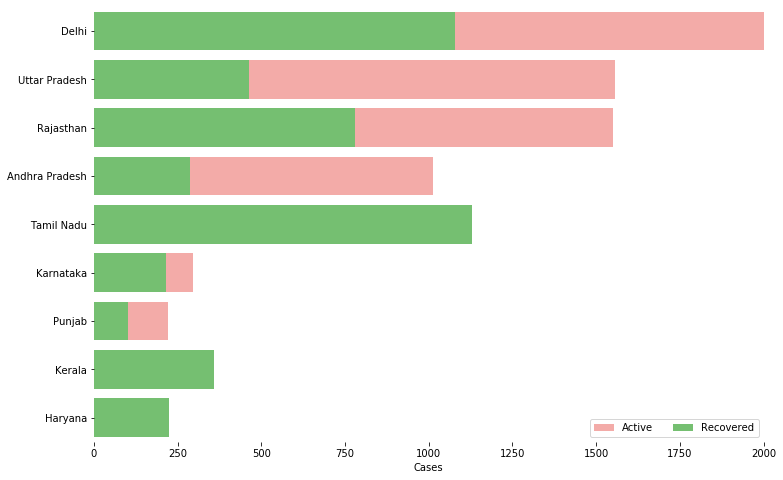

In [39]:
#seaborn for visualization -"confirmed vs recovered figure"
f,ax = plt.subplots(figsize=(12,8))
data= df_full[['Name of State / UT','Active','Recovered','Deaths']]
data.sort_values('Active',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Active",y="Name of State / UT", data=data,label="Active",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered",y="Name of State / UT",data=data,label="Recovered",color="g")

#add a legend and informative axis label
ax.legend(ncol=2,loc="lower light",frameon=True)
ax.set(xlim=(0,2000), ylabel="",xlabel="Cases")
sns.despine(left=True,bottom=True)


In [44]:
#"Rise of coronavirus cases"
#import plotly.graph object as go
#rise of covid-19 cases in India
import plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of CoronaVirus cases in India(Cummulative Cases)',plot_bgcolor='rgb(230,230,230)')
fig.show()

#New Covid-19 cases reported daily in India
import plotly.express as px
fig = px.bar(dbd_India, x="Date",y="New Cases", barmode="group", height=400)
fig.update_layout(title_text='Covid-19 cases in India daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()

In [45]:
#"Cumulative cases in Italy,S.Korea,Wuhan"
'''Color scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

import plotly.express as px
fig = px.bar(dbd_Italy, x="Date",y="Total Cases", color="Total Cases", orientation='v', height=600, title='Confirmed cases in Italy', color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

import plotly.express as px
fig = px.bar(dbd_Korea, x="Date",y="Total Cases", color="Total Cases", orientation='v', height=600, title='Confirmed cases in South Korea', color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

import plotly.express as px
fig = px.bar(dbd_Wuhan, x="Date",y="Total Cases", color="Total Cases", orientation='v', height=600, title='Confirmed cases in Wuhan', color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [46]:
#"Comparison between rise of cases in India,South Korea,Italy"
# import plotly.graph_objects as go

from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,specs=[[{}, {}],[{"colspan": 2}, None]],subplot_titles=("S.Korea","Italy","India"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)
fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()                                                                                

In [48]:
#"Trend after crossing 100 cases"
 #import plotly.graph_objects as go
title='Main Source of News'
labels=['S.Korea','Italy','India']
colors=['rgb(122,128,0)','rgb(255,0,0)','rgb(49,130,189)']

mode_size=[10,10,12]
line_size=[1,1,8]

fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],y=dbd_Korea['Total Cases'],mode='lines',name=labels[0],line=dict(color=colors[0], width=line_size[0]),connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],y=dbd_Italy['Total Cases'],mode='lines',name=labels[1],line=dict(color=colors[1], width=line_size[1]),connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],y=dbd_India['Total Cases'],mode='lines',name=labels[2],line=dict(color=colors[2], width=line_size[2]),connectgaps=True))

annotations=[]

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,xanchor='center', yanchor='top',text='Days after crossing 100 cases ',font=dict(family='Arial',size=12,color='rgb(150,150,150)'),showarrow=False))
fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.show()

In [116]:
#"Exploring worldwide data"
df=pd.read_csv('E:/Coder Subha/Machine Learning/Latest CV/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

df_confirmed=pd.read_csv('E:/Coder Subha/Machine Learning/Latest CV/time_series_covid19_confirmed_global.csv')
df_deaths=pd.read_csv('E:/Coder Subha/Machine Learning/Latest CV/time_series_covid19_deaths_global.csv')
df_recovered=pd.read_csv('E:/Coder Subha/Machine Learning/Latest CV/time_series_covid19_recovered_global.csv')

df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)


In [115]:
#"Visualising Worldwide Covid-19 data"
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [105]:
#check for USA data
df.query('Country=="US"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,1,0,0
1,2020-01-23,1,0,0
2,2020-01-24,2,0,0
3,2020-01-25,2,0,0
4,2020-01-26,5,0,0
...,...,...,...,...
93,2020-04-24,905358,51493,99079
94,2020-04-25,938154,53755,100372
95,2020-04-26,965785,54881,106988
96,2020-04-27,988197,56259,111424


In [106]:
#check for Australia data
df.query('Country=="Australia"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,4,0,0
...,...,...,...,...
93,2020-04-24,6677,79,5136
94,2020-04-25,6694,80,5376
95,2020-04-26,6714,83,5541
96,2020-04-27,6721,83,5588


In [107]:
#overall world situation
df.groupby('Date').sum().head()


,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5615.595617,5920.673761,555,17,28
2020-01-23,5615.595617,5920.673761,654,18,30
2020-01-24,5615.595617,5920.673761,941,26,35
2020-01-25,5615.595617,5920.673761,1434,42,38
2020-01-26,5615.595617,5920.673761,2118,56,51


In [108]:
#"Visualising Worldwide Covid-19 data"
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths',line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered',line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [109]:
from fbprophet import Prophet

In [111]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [117]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [118]:
confirmed.tail()

,ds,y
93,2020-04-24,2811598
94,2020-04-25,2897619
95,2020-04-26,2972358
96,2020-04-27,3041759
97,2020-04-28,3116393


In [119]:
#"Forecasting confirmed Covid-19 cases with Prophet"
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
100,2020-05-01
101,2020-05-02
102,2020-05-03
103,2020-05-04
104,2020-05-05


In [120]:
#predicting future with date and y value
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
100,2020-05-01,3.378129e+06,3.357583e+06,3.397704e+06
101,2020-05-02,3.460908e+06,3.430017e+06,3.488640e+06
102,2020-05-03,3.542039e+06,3.497168e+06,3.578356e+06
103,2020-05-04,3.619917e+06,3.562717e+06,3.666652e+06
104,2020-05-05,3.699227e+06,3.632009e+06,3.760258e+06


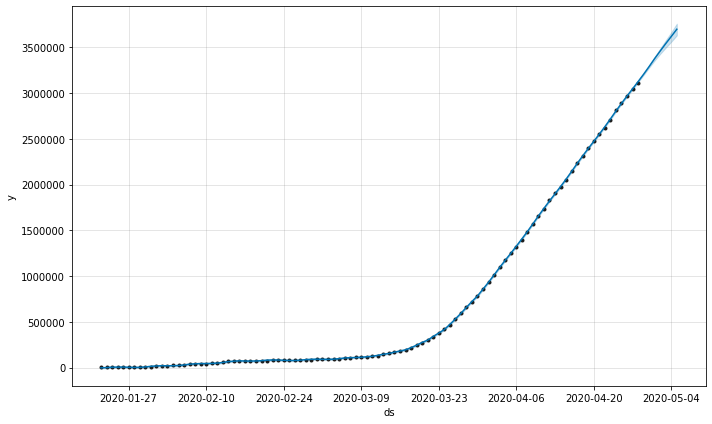

In [121]:
confirmed_forecast_plot=m.plot(forecast)

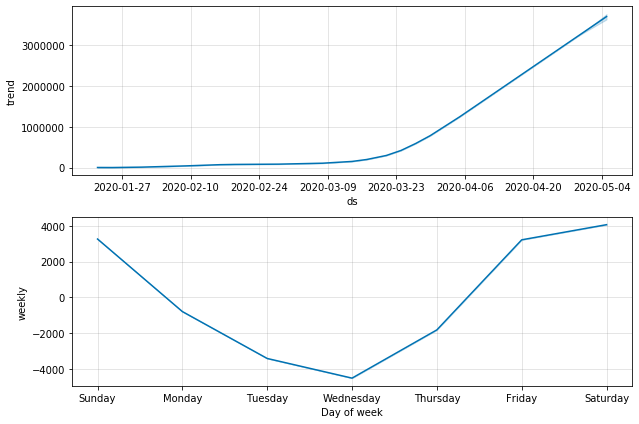

In [122]:
confirmed_forecast_plot=m.plot_components(forecast)